# Model Diagnostics and Visualization

In this notebook, we will diagnose and visualize the performance of our trained linear regression model. The goal is to understand how well the model is performing and identify areas for improvement.

## 1. Model Performance Metrics

We will start by evaluating the model using key performance metrics such as Mean Squared Error (MSE) and R-squared. These metrics will help us understand the accuracy and goodness-of-fit of our model.

In [6]:
# Load Libraries and Data
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from src.train_linear_regression import LinearRegression  # Assuming you have a LinearRegression class

# Load the transformed data from the CSV file
df_diabetes = pd.read_csv('../../data/processed/diabetes_data_boxcox_transformed.csv')

# Separate features and target variable
X = df_diabetes.drop(columns=['target'])  # Replace 'target' with the actual target column name
y = df_diabetes['target']  # Replace 'target' with the actual target column name

# Create a train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=49)

# Train the model on the training data
linear_regression = LinearRegression()
linear_regression.fit(X_train, y_train)

# Evaluate the model on the training data
y_train_pred = linear_regression.predict(X_train)
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

print(f'Mean Squared Error (MSE) on training data: {mse_train}')
print(f'R-squared (R²) on training data: {r2_train}')

Mean Squared Error (MSE) on training data: 3.664770022869625
R-squared (R²) on training data: 0.48291241810632657


### Model Evaluation Metrics

- **Mean Squared Error (MSE)**: The MSE value on the training data is **3.664**. This metric represents the average squared difference between the actual and predicted values. A lower MSE indicates that the predictions are closer to the actual values, but since it is a squared metric, it can be sensitive to outliers. In this case, while the MSE seems reasonable, it suggests that there are still some differences between the predictions and actual values that could be reduced with model improvement.

- **R-squared (R²)**: The R² value on the training data is **0.483**. R² represents the proportion of variance in the target variable that is explained by the model. An R² value closer to 1 indicates a better fit, while a value closer to 0 suggests the model is not explaining much of the variance. Here, the R² value of 0.483 means that approximately 48.3% of the variance in the target variable is being explained by the model, leaving room for potential improvements.

Together, these metrics indicate that while the model is able to capture some patterns in the data, there is still a significant portion of variance that remains unexplained, and the model could benefit from further refinement.

## 2. Residual Analysis

Residual analysis involves examining the differences between the actual and predicted values. This can help us identify patterns that the model is not capturing, which may indicate areas for improvement.

In the residual density plot, we visualize the distribution of the residuals (the differences between the actual and predicted values). Ideally, the residuals should be normally distributed around zero, indicating that the model's errors are randomly distributed and not biased in any particular direction.

### Interpretation of the Residual Density Plot:

- **Center Around Zero**: If the residuals are centered around zero, it suggests that the model's predictions are unbiased on average.
- **Normal Distribution**: A bell-shaped curve indicates that the residuals follow a normal distribution, which is a desirable property for many statistical models.
- **Skewness**: If the plot is skewed to the left or right, it indicates that the model consistently underestimates or overestimates the target variable.
- **Kurtosis**: High peaks or heavy tails in the plot suggest that the model's errors have higher variance than expected, which may indicate outliers or heteroscedasticity.

By analyzing the residual density plot, we can gain insights into the model's performance and identify potential areas for improvement.

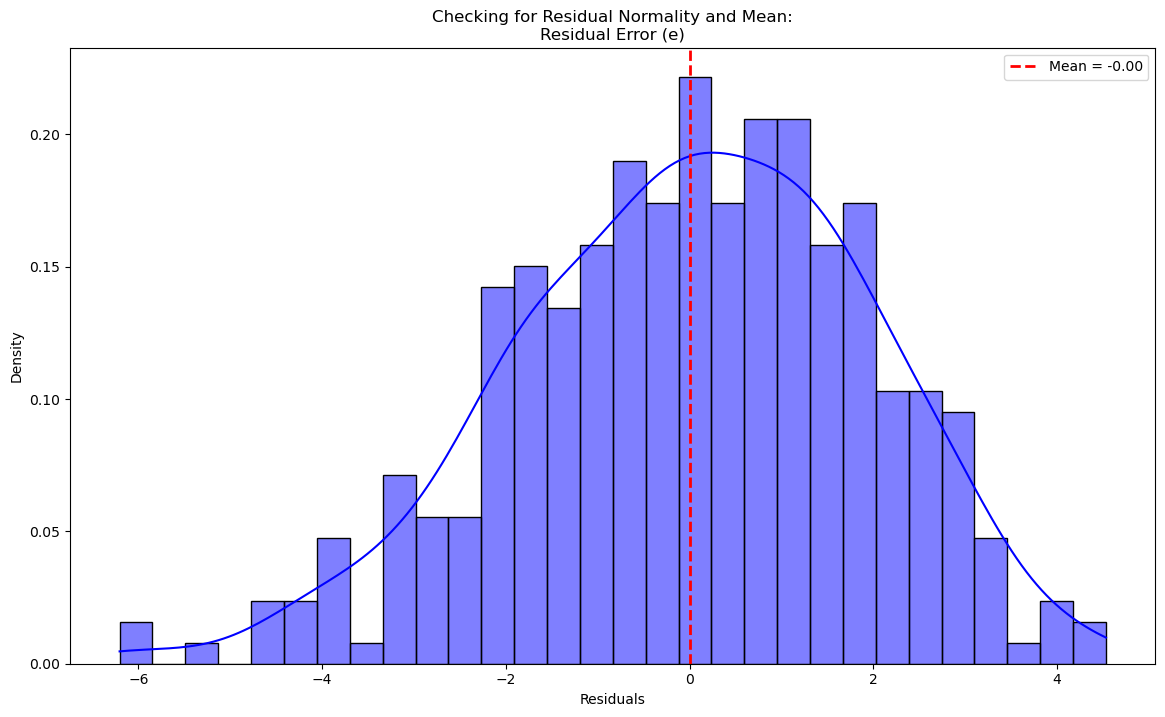

In [11]:
from model.visualization import plot_residual_density

e = plot_residual_density(y_train, y_train_pred)

As observed in the plot above, the residuals are centered around zero, and the curve follows a bell-shaped pattern, indicating that the residuals are normally distributed. This suggests that the model's predictions are generally unbiased and that the errors are randomly distributed.

### Q-Q Plot for Multivariate Normality:

We can also use a Q-Q plot to check for multivariate normality of the residuals. This plot compares the quantiles of the residuals to the quantiles of a normal distribution.

- **Straight Line**: If the points lie on a straight line, it indicates that the residuals follow a normal distribution.
- **Deviations**: Deviations from the straight line suggest departures from normality, which may indicate issues with the model.

By analyzing the Q-Q plot, we can further assess the normality of the residuals and identify potential areas for improvement.

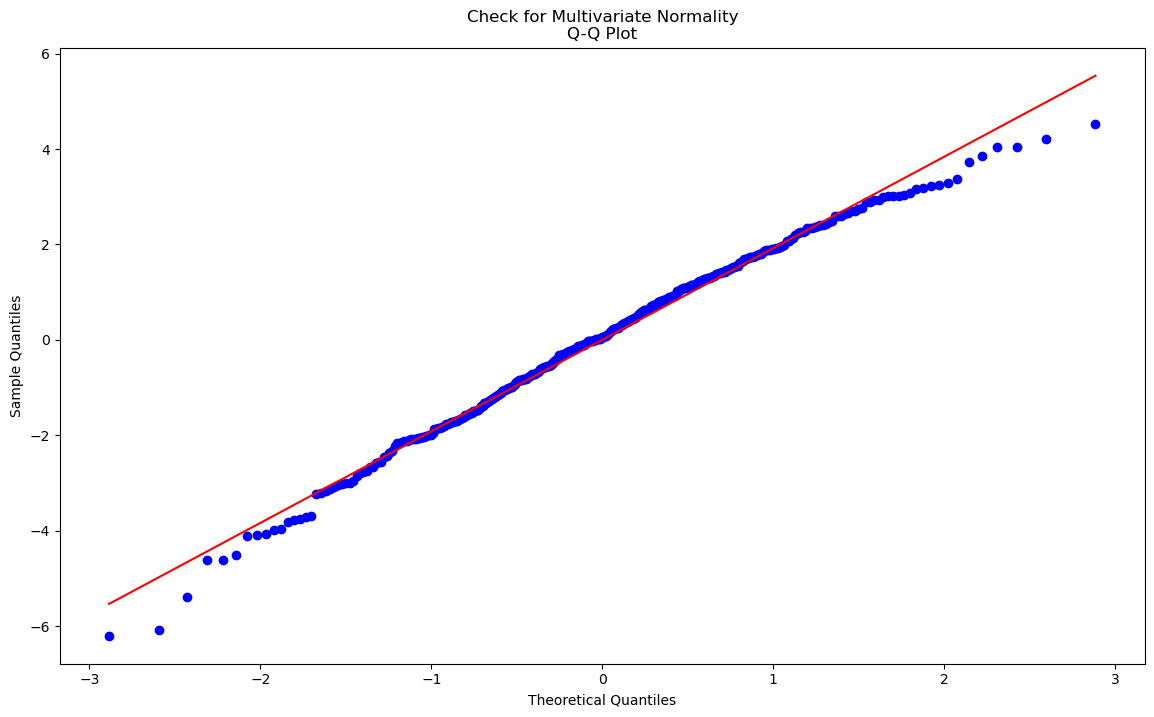

Correlation coefficient (r): 0.9959


0.9958549133427316

In [12]:
from model.visualization import plot_multivariate_qq

plot_multivariate_qq(e=e)

### Interpretation of the Correlation Coefficient (r)

The correlation coefficient (r) obtained from the Q-Q plot is **0.9959**. This value provides insight into how well the residuals follow a normal distribution.

- **Value Close to 1**: A correlation coefficient close to 1 indicates a strong linear relationship between the quantiles of the residuals and the quantiles of a normal distribution. In this case, the value of **0.9959** suggests that the residuals are very close to being normally distributed.

- **Implications for Model**: Since the residuals are nearly normally distributed, it implies that the model's errors are randomly distributed and not biased in any particular direction. This is a desirable property for many statistical models, as it suggests that the model is well-specified and that the assumptions of normality are met.

By analyzing the correlation coefficient from the Q-Q plot, we can confirm that the residuals exhibit a strong adherence to normality, indicating good model performance in this aspect.

## 3. Actual vs Predicted Values
We will create a scatter plot to visualize the relationship between the actual and predicted values. This plot will help us assess how well the model's predictions align with the actual data.

**Detailed Explanation:**
- **Scatter Plot**: A scatter plot is a visualization tool that shows the relationship between two variables. In this case, we will plot the actual values on the x-axis and the predicted values on the y-axis.
- **Line of Perfect Prediction**: A 45-degree line, where the predicted values equal the actual values, will be included to help visually assess the model’s accuracy.

**Interpretation:**
- **Points Close to the Line**: If the points are close to the line of perfect prediction, this indicates that the model's predictions are accurate.
- **Points Far from the Line**: If the points are far from the line, it suggests that the model's predictions are less accurate.
- **Patterns**: Any systematic patterns in the scatter plot (e.g., a curve or clusters) may indicate that the model is not capturing certain aspects of the data, suggesting areas for improvement.

By analyzing the scatter plot, we can gain insights into the model's performance and identify potential areas for improvement.

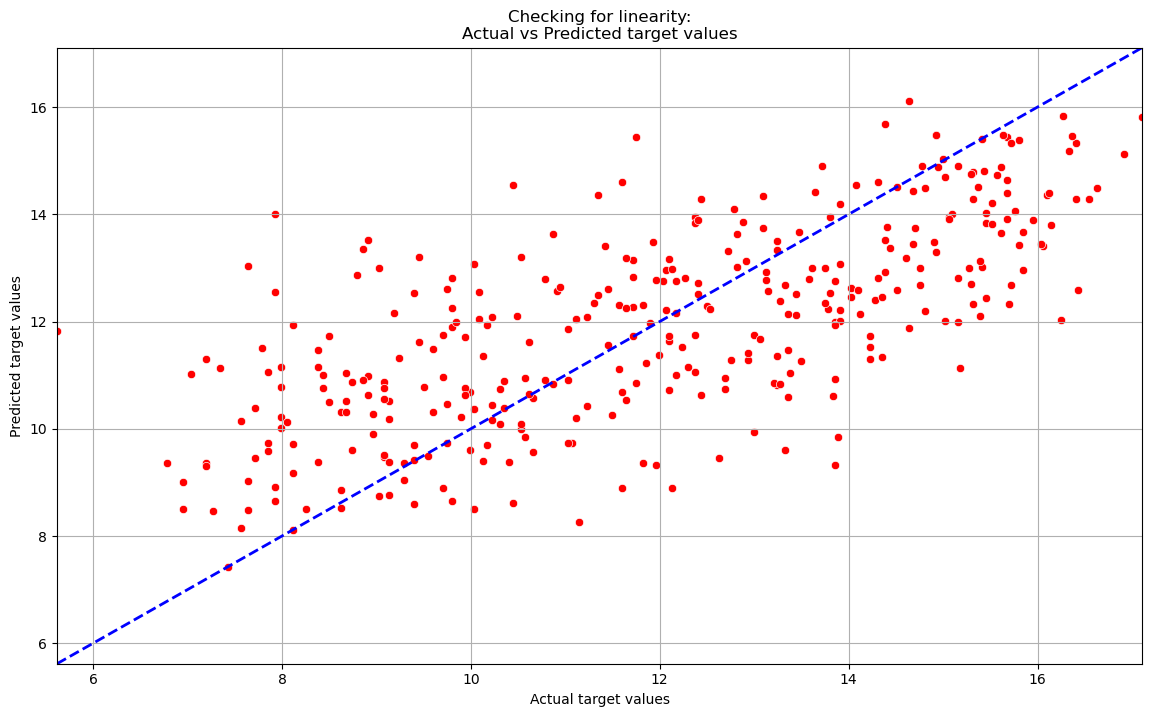

In [9]:
from model.visualization import plot_actual_vs_predicted

plot_actual_vs_predicted(y_train, y_train_pred)

As observed in the scatter plot above, the points are fairly dispersed around the blue reference line (line of perfect prediction). This indicates that the model's predictions are not highly accurate, as there is noticeable deviation from the ideal line where predicted values would match the actual values.

## 4. Homoscedasticity and VIF

### Homoscedasticity
Homoscedasticity refers to the assumption that the variance of the residuals (errors) is constant across all levels of the independent variables. This is an important assumption in linear regression, as it ensures that the model's predictions are equally reliable across the range of the data.

- **Visual Check**: We can check for homoscedasticity by plotting the residuals against the predicted values. If the residuals are randomly scattered around zero and show no clear pattern, it suggests that homoscedasticity holds.

- **Implications**:
  - **Homoscedasticity**: If the residuals exhibit constant variance, it indicates that the model's predictions are consistent and reliable.
  - **Heteroscedasticity**: If the residuals show a pattern (e.g., funnel shape), it suggests that the variance of the errors is not constant, which can lead to inefficient estimates and affect the validity of statistical tests.

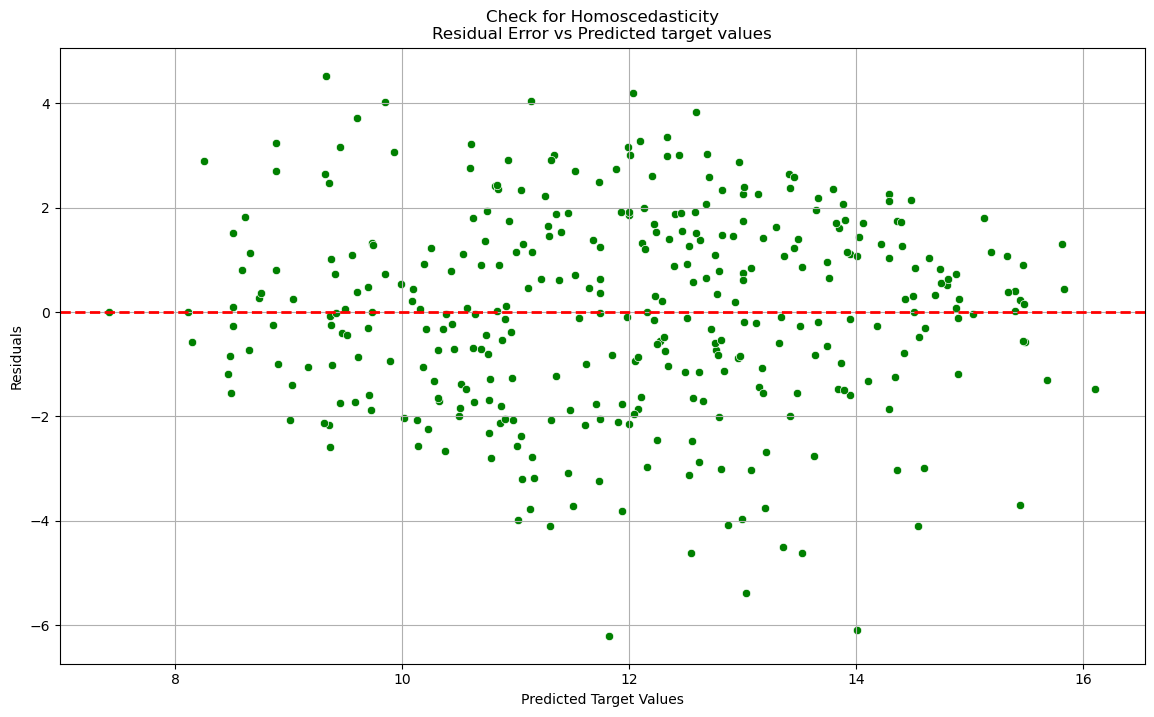

       Feature        VIF
0   Unnamed: 0   1.004060
1          age   1.277765
2          sex   1.251920
3          bmi   1.551482
4           bp   1.463690
5           s1  64.459836
6           s2  41.983491
7           s3  16.116831
8           s4   9.266396
9           s5  10.382252
10          s6   1.531523


In [15]:
from model.visualization import plot_homoscedasticity_and_vif

vif_data = plot_homoscedasticity_and_vif(y_train_pred, e, X_train)

As observed in the plot above, the residuals appear to be randomly scattered, suggesting a constant variance. However, there are a few noticeable outliers present. Overall, the distribution of the residuals indicates that the assumption of homoscedasticity is largely satisfied.


### Variance Inflation Factor (VIF)
Variance Inflation Factor (VIF) is a measure of multi collinearity in a set of multiple regression variables. It quantifies how much the variance of a regression coefficient is inflated due to multi collinearity.

- **Calculation**: VIF is calculated for each predictor by regressing it against all other predictors and then computing the R-squared value. The formula for VIF is: 
  
- **Interpretation**:
  - **VIF = 1**: No correlation between the predictor and other variables.
  - **1 < VIF < 5**: Moderate correlation, but not severe enough to warrant corrective measures.
  - **VIF > 5**: High correlation, indicating multi collinearity, which may require corrective measures such as removing or combining variables.

By analyzing homoscedasticity and VIF, we can ensure that the assumptions of linear regression are met and that the model's estimates are reliable and valid.



In [16]:
vif_data

,Feature,VIF
0,Unnamed: 0,1.004060
1,age,1.277765
2,sex,1.251920
3,bmi,1.551482
4,bp,1.463690
5,s1,64.459836
6,s2,41.983491
7,s3,16.116831
8,s4,9.266396
9,s5,10.382252


### Variance Inflation Factor (VIF) Analysis

The table below presents the VIF values for each feature in our model:

| Feature     | VIF       |
|-------------|-----------|
| Unnamed: 0  | 1.004060  |
| age         | 1.277765  |
| sex         | 1.251920  |
| bmi         | 1.551482  |
| bp          | 1.463690  |
| s1          | 64.459836 |
| s2          | 41.983491 |
| s3          | 16.116831 |
| s4          | 9.266396  |
| s5          | 10.382252 |
| s6          | 1.531523  |

### Interpretation of VIF Values

- **Low VIF Values (1 - 5)**: Features such as `age`, `sex`, `bmi`, `bp`, and `s6` exhibit low VIF values, indicating that these predictors have minimal correlation with other variables in the model. This suggests that they are contributing useful information without causing multi collinearity.

- **Moderate VIF Values (5 - 10)**: The features `s4` and `s5` have VIF values of 9.27 and 10.38, respectively. While these values indicate moderate correlation, they are not severe enough to require immediate corrective measures, but they should be monitored for potential multi collinearity issues.

- **High VIF Values (> 10)**: Features `s1` and `s2` exhibit significantly high VIF values of 64.46 and 41.98, indicating a strong multi collinearity problem. This suggests that these features are highly correlated with one another, which may distort the coefficient estimates and affect the reliability of the model. It may be necessary to consider removing or combining these variables to mitigate the effects of multi collinearity.

By analyzing the VIF values, we can identify features that may need further investigation or adjustment to enhance the model's performance and reliability.


## 5. Model Improvement Strategies

Based on the diagnostics and visualizations, we will discuss potential strategies for improving the model. This may include feature engineering, trying different algorithms, or tuning hyperparameters.

Let's get started by loading the necessary libraries and data.